# **Hyperparameter Optimization**
### Author: Dayne N. Fradejas 
---



# **Red Wine Quality Detection using SVM - SVC**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import Pipeline

In [ ]:
red_wine = []

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")

# data preparation
for _, row in data.iterrows():
  red_wine.append(row[0].split(";"))

df = pd.DataFrame(red_wine, columns =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide', 'density','pH', 'sulphates','alcohol','quality'],
                                           dtype = float) 

# clean data with empty cells and cells with "?" and replace it with NaN
df = df.replace(r'^s*$', float('NaN'), regex = True)
df = df.replace("?", float('NaN'))

# drop rows with NaN values
df = df.dropna()

# red wine
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [ ]:
# Split the samples into 70% Training, 30% testing at random
X, y = df.iloc[:,:-1].to_numpy(), df.iloc[:,-1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state = 85,
                                                    stratify=y)

print(X_train.shape)
print(X_test.shape)

(1119, 11)
(480, 11)


## **Using GridSearch**

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END clf__C=0.5, clf__degree=2, clf__gamma=auto, clf__kernel=rbf; total time=   0.3s
[CV] END clf__C=0.5, clf__degree=2, clf__gamma=auto, clf__kernel=rbf; total time=   0.2s
[CV] END clf__C=0.5, clf__degree=2, clf__gamma=auto, clf__kernel=rbf; total time=   0.1s
[CV] END clf__C=0.5, clf__degree=2, clf__gamma=auto, clf__kernel=rbf; total time=   0.1s
[CV] END clf__C=0.5, clf__degree=2, clf__gamma=auto, clf__kernel=rbf; total time=   0.1s
[CV] END clf__C=0.5, clf__degree=2, clf__gamma=auto, clf__kernel=sigmoid; total time=   0.1s
[CV] END clf__C=0.5, clf__degree=2, clf__gamma=auto, clf__kernel=sigmoid; total time=   0.1s
[CV] END clf__C=0.5, clf__degree=2, clf__gamma=auto, clf__kernel=sigmoid; total time=   0.1s
[CV] END clf__C=0.5, clf__degree=2, clf__gamma=auto, clf__kernel=sigmoid; total time=   0.1s
[CV] END clf__C=0.5, clf__degree=2, clf__gamma=auto, clf__kernel=sigmoid; total time=   0.1s
[CV] END clf__C=0.5, clf__de

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


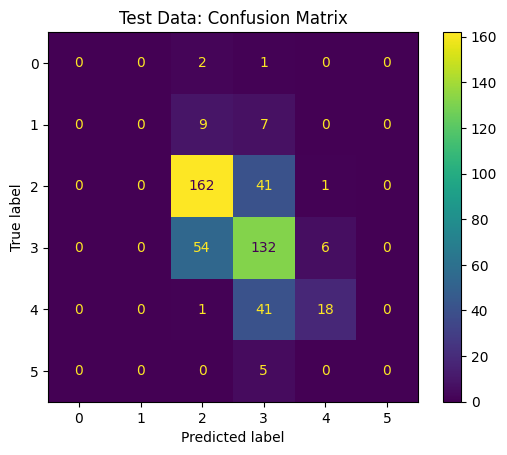

In [ ]:
# prepare the pipeline with StandardScaler and SVC
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC())
])

# Specify the grid: parameters and values
param_grid = {'clf__C': [0.5, 0.7, 1.0, 5.0, 10.0 , 50.0, 100.00, 500, 1000], 
              'clf__kernel': ['rbf','sigmoid'],
              'clf__gamma': ['auto'],
              'clf__degree':[2, 3]} 

# prepare the model for grid_search
grid_search = GridSearchCV(pipe, param_grid, refit=True, verbose=2)

start = time()
grid_search.fit(X_train, y_train)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_["params"])))

# Print best parameters after tuning
print(grid_search.best_params_)
  
# Print how our model looks after hyper-parameter tuning
print(grid_search.best_estimator_)

grid_predictions = grid_search.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

cfm = confusion_matrix(y_test, grid_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = np.arange(0,6))
cm_display.plot()
plt.title('Test Data: Confusion Matrix')
plt.show()

### **Results 1**
Based in the results, performing the hyper-parameter tuning using GridSearch with parameters:

```
param_grid = {'clf__C': [0.5, 0.7, 1.0, 5.0, 10.0 , 50.0, 100.00, 500, 1000], 
              'clf__kernel': ['rbf','sigmoid'],
              'clf__gamma': ['auto'],
              'clf__degree':[2, 3]} 
```

**Note:** Some tests has been performed prior to the param_grid parameters. The parameters has been reduced to effectively show the results. 

In the results given for GridSearch, using k-fold cross validation (5-folds to verify the results), the model was able to achieve the following results:

```
GridSearchCV took 22.69 seconds for 36 candidate parameter settings.
{'clf__C': 1.0, 'clf__degree': 2, 'clf__gamma': 'auto', 'clf__kernel': 'rbf'}
Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SVC(degree=2, gamma='auto'))])
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00        16
         5.0       0.71      0.79      0.75       204
         6.0       0.58      0.69      0.63       192
         7.0       0.72      0.30      0.42        60
         8.0       0.00      0.00      0.00         5

    accuracy                           0.65       480
   macro avg       0.34      0.30      0.30       480
weighted avg       0.62      0.65      0.62       480

```

where the precision for classes **4.0, 5.0, 6.0, 7.0, 8.0,** obtained a value of **0.00, 0.71, 0.58, 0.72, 0.0** which obtained a precision value greater than the paper in comparison to: **20.0, 67.5, 57.7, 58.6, 0.** However, the values for the prediction of 4.0 lowered. 







## **Using RandomizedSearch**

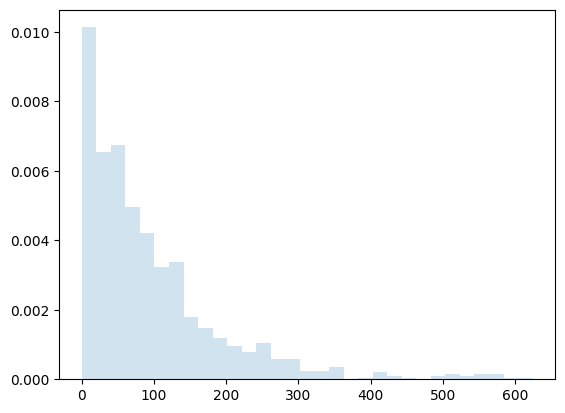

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END clf__C=130.50947484816803, clf__gamma=0.0487020605257579, clf__kernel=sigmoid; total time=   0.1s
[CV] END clf__C=130.50947484816803, clf__gamma=0.0487020605257579, clf__kernel=sigmoid; total time=   0.1s
[CV] END clf__C=130.50947484816803, clf__gamma=0.0487020605257579, clf__kernel=sigmoid; total time=   0.1s
[CV] END clf__C=130.50947484816803, clf__gamma=0.0487020605257579, clf__kernel=sigmoid; total time=   0.1s
[CV] END clf__C=130.50947484816803, clf__gamma=0.0487020605257579, clf__kernel=sigmoid; total time=   0.1s
[CV] END clf__C=46.5536678148407, clf__gamma=0.3175160459560448, clf__kernel=sigmoid; total time=   0.1s
[CV] END clf__C=46.5536678148407, clf__gamma=0.3175160459560448, clf__kernel=sigmoid; total time=   0.1s
[CV] END clf__C=46.5536678148407, clf__gamma=0.3175160459560448, clf__kernel=sigmoid; total time=   0.1s
[CV] END clf__C=46.5536678148407, clf__gamma=0.3175160459560448, clf__kernel=sigmoid; to

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


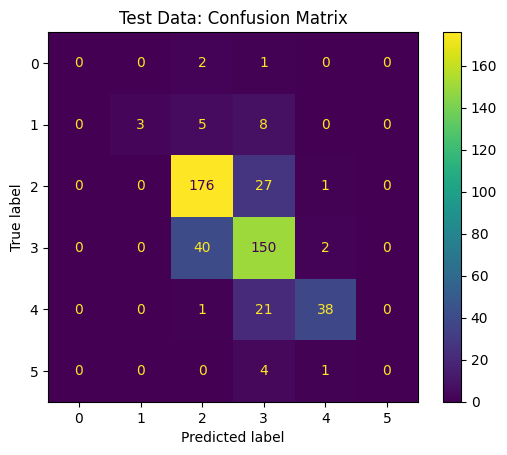

In [ ]:
import scipy.stats as stats
param_dist = {'clf__C': stats.expon(scale=100), 
              'clf__gamma': stats.expon(scale=.1),
              'clf__kernel': ['rbf','sigmoid']
              }

# To get a feel for the exponential distribution
random_C = stats.expon.rvs(scale=100,size=1000)
fig, ax = plt.subplots(1, 1)
ax.hist(random_C, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.show()

# create a pipeline for SVC and StandardScaler()
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC())
    ])

max_iter = 20

random_search = RandomizedSearchCV(pipe, param_distributions=param_dist, n_iter=max_iter, verbose=2)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
        % ((time() - start), max_iter))

# Print best parameters after tuning
print(random_search.best_params_)
  
# Print how our model looks after hyper-parameter tuning
print(random_search.best_estimator_)

random_predictions = random_search.predict(X_test)
  
# print classification report
print(classification_report(y_test, random_predictions))

cfm = confusion_matrix(y_test, random_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = np.arange(0,6))
cm_display.plot()
plt.title('Test Data: Confusion Matrix')
plt.show()



### **Results 2**
Based in the results, performing the hyper-parameter tuning using GridSearch with parameters:

```
param_dist = {'clf__C': stats.expon(scale=100), 
              'clf__gamma': stats.expon(scale=.1),
              'clf__kernel': ['rbf','sigmoid']
              }
```

**Note:** Some tests has been performed prior to the param_grid parameters. The parameters has been reduced to effectively show the results. 

In the results given for GridSearch, using k-fold cross validation (5-folds to verify the results), the model was able to achieve the following results:

```
RandomizedSearchCV took 17.16 seconds for 20 candidates parameter settings.
{'clf__C': 1.1387249879932047, 'clf__gamma': 0.22866111127724265, 'clf__kernel': 'rbf'}
Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SVC(C=1.1387249879932047, gamma=0.22866111127724265))])
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         3
         4.0       1.00      0.19      0.32        16
         5.0       0.79      0.86      0.82       204
         6.0       0.71      0.78      0.74       192
         7.0       0.90      0.63      0.75        60
         8.0       0.00      0.00      0.00         5

    accuracy                           0.76       480
   macro avg       0.57      0.41      0.44       480
weighted avg       0.76      0.76      0.75       480

```

where the precision for classes **4.0, 5.0, 6.0, 7.0, 8.0,** obtained a value of **1.00, 0.79, 0.71, 0.90, 0.0** which obtained a precision value greater than the paper and the prior results which has a **total weighted avg of 0.76** at **T = 0.5**. Therefore, we can also assume that it has a greater accuracy when T = 1.0 where 2 classes has been considered true. 


# **Red Wine Quality Detection using SVM-SVR**

In [ ]:
# split the data
# Split the samples into 70% Training, 30% testing at random
X, y = df.iloc[:,:-1].to_numpy(), df.iloc[:,-1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state = 85,
                                                    stratify=y)

print(X_train.shape)
print(X_test.shape)

(1119, 11)
(480, 11)


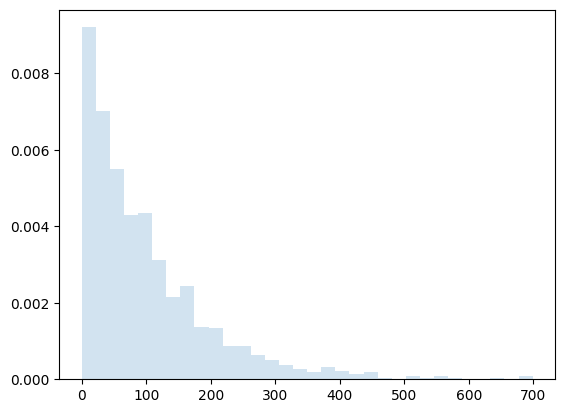

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END clf__C=6.135894959517804, clf__gamma=0.037471699513593464, clf__kernel=rbf; total time=   0.7s
[CV] END clf__C=6.135894959517804, clf__gamma=0.037471699513593464, clf__kernel=rbf; total time=   0.5s
[CV] END clf__C=6.135894959517804, clf__gamma=0.037471699513593464, clf__kernel=rbf; total time=   0.3s
[CV] END clf__C=6.135894959517804, clf__gamma=0.037471699513593464, clf__kernel=rbf; total time=   0.3s
[CV] END clf__C=6.135894959517804, clf__gamma=0.037471699513593464, clf__kernel=rbf; total time=   0.4s
[CV] END clf__C=253.482943418161, clf__gamma=0.02636946709741377, clf__kernel=linear; total time=  35.9s
[CV] END clf__C=253.482943418161, clf__gamma=0.02636946709741377, clf__kernel=linear; total time=  25.3s
[CV] END clf__C=253.482943418161, clf__gamma=0.02636946709741377, clf__kernel=linear; total time=  22.0s
[CV] END clf__C=253.482943418161, clf__gamma=0.02636946709741377, clf__kernel=linear; total time=  23.7

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


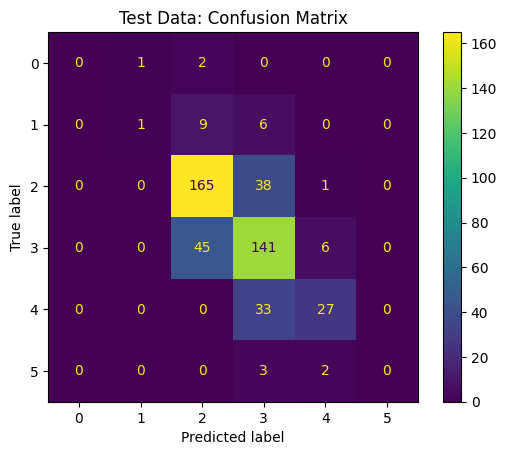

In [ ]:
from sklearn.svm import SVR

import scipy.stats as stats
param_dist = {'clf__C': stats.expon(scale=100), 
              'clf__gamma': stats.expon(scale=.1),
              'clf__kernel': ['rbf','linear','sigmoid']
              }

# To get a feel for the exponential distribution
random_C = stats.expon.rvs(scale=100,size=1000)
fig, ax = plt.subplots(1, 1)
ax.hist(random_C, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.show()

# create a pipeline for SVC and StandardScaler()
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVR())
    ])

max_iter = 20

random_search = RandomizedSearchCV(pipe, param_distributions=param_dist, n_iter=max_iter, verbose=2)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
        % ((time() - start), max_iter))

# Print best parameters after tuning
print(random_search.best_params_)
  
# Print how our model looks after hyper-parameter tuning
print(random_search.best_estimator_)

# setting prediction tollerance to T = 0.5
prediction = random_search.predict(X_test)
random_predictions = [min(max(round(y), 3), 8) for y in prediction]

# print classification report
print(classification_report(y_test, random_predictions))

cfm = confusion_matrix(y_test, random_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = np.arange(0,6))
cm_display.plot()
plt.title('Test Data: Confusion Matrix')
plt.show()



In [ ]:
# Compute classification metrics
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error

# using the results obtained from the earlier test 
model = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', gamma = 0.037471699513593464, C = 6.135894959517804)).fit(X_train, y_train)

y_pred_class = model.predict(X_test)
# y_pred_class = [min(max(round(y), 3), 8) for y in y_pred_class]

r2 = r2_score(y_test, y_pred_class)
mse = mean_squared_error(y_test, y_pred_class)
mad = mean_absolute_error(y_test, y_pred_class)

print("R^2: {:.6f}".format(r2))
print("MSE: {:.6f}".format(mse))
print("MAD: {:.6f}".format(mad))

R^2: 0.382204
MSE: 0.400535
MAD: 0.456692


## **Using RandomizedSeach & Results**

Unlike the previous tests, SVR has been used to classify the wine quality of the red win from the given data points. However, using **Regression** as a classifier doesn't directly classify the quality as an exact number that's why a **tolerance of 0.5** has been set to round up or down the value to obtain the result. 

To successfully classify / predict the wine quality, the following code snippet has been used:

```
# setting prediction tollerance to T = 0.5
prediction = random_search.predict(X_test)
random_predictions = [min(max(round(y), 3), 8) for y in prediction]
```

wherein the values has been mapped from 3 to 8 and used the min/max operator to obtain the desired result. 

The results obtained in using RandomizedSearch obtained a high precision result as shown below: 


```
RandomizedSearchCV took 438.35 seconds for 20 candidates parameter settings.
{'clf__C': 6.135894959517804, 'clf__gamma': 0.037471699513593464, 'clf__kernel': 'rbf'}
Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SVR(C=6.135894959517804, gamma=0.037471699513593464))])
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         3
         4.0       0.50      0.06      0.11        16
         5.0       0.75      0.81      0.78       204
         6.0       0.64      0.73      0.68       192
         7.0       0.75      0.45      0.56        60
         8.0       0.00      0.00      0.00         5

    accuracy                           0.70       480
   macro avg       0.44      0.34      0.36       480
weighted avg       0.68      0.70      0.68       480

```
The results obtained on using SVR and RandomizedSearch obtained results greater than that of the paper. 


# **Discussion of Results**
Upon performing different tests in the data  for the red wine quality, varying results has been obtained depending on how the data is treated. 

**Treating the Problem as Classification Problem (SVC) or (SVR).**
In treating the red wine quality as classification problem, the model has higher precision than that of the regression classifier. One of the reasons why the SVC has higher precision and accuracy is because the exact classification value is obtained in comparison with the regression problem *which requires transforming the results depending on the treshold that has been set.*  

**Making use of SVR**. One of the advantages of SVR (even the precision is lower than that of the SVC), it gives an exact approximate of the value and its classification whether it is between two classes or it gives the rating of the quality of the wine. 

# **Conclusion**
In conclusion, both SVM method gives an accurate results. *SVC* can be used to give an exact quality of the wine-product and gives an exact value. *SVR* on the other hand, gives the approximate quality of the wine which can also serve as a **rating** of the wine (which the SVC model is not able to give exact results). Both are good models depending on how the user wants it to be used. 